In [ ]:
#### Random Forest ####

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\Vineet Jain\Desktop\Rel.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-11,1938.800049,1938.800049,1892.500000,1897.250000,1891.166260,15371556
1,2021-01-12,1903.000000,1960.000000,1899.900024,1957.050049,1950.774536,18996047
2,2021-01-13,1963.550049,1974.949951,1918.449951,1938.800049,1932.583130,12284876
3,2021-01-14,1945.000000,1966.900024,1939.050049,1960.599976,1954.313110,9946818
4,2021-01-15,1960.599976,1973.800049,1920.050049,1937.449951,1931.237305,9503790


In [5]:
df_1 = df[["Adj Close", "Volume"]]
df_1["Pct_change"] = df["Adj Close"].pct_change()
df_1.head()

C:\Users\VINEET~1\AppData\Local\Temp/ipykernel_6900/308121390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Pct_change"] = df["Adj Close"].pct_change()


,Adj Close,Volume,Pct_change
0,1891.166260,15371556,NaN
1,1950.774536,18996047,0.031519
2,1932.583130,12284876,-0.009325
3,1954.313110,9946818,0.011244
4,1931.237305,9503790,-0.011808


In [6]:
# Drop null values
df_1.dropna(inplace = True)
df_1.head()

C:\Users\Vineet Jain\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Adj Close,Volume,Pct_change
1,1950.774536,18996047,0.031519
2,1932.583130,12284876,-0.009325
3,1954.313110,9946818,0.011244
4,1931.237305,9503790,-0.011808
5,1977.588257,16198856,0.024001


In [7]:
df_1.dtypes

Adj Close     float64
Volume          int64
Pct_change    float64
dtype: object

In [8]:
X = df_1.drop('Adj Close',axis=1)
y = df_1['Adj Close']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [19]:
X_train.head()

,Volume,Pct_change
111,42209687,-0.023511
16,13984228,0.002518
145,3755507,-0.003212
8,18038987,0.021755
206,4948422,0.001824


In [20]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [21]:
rfc = RandomForestRegressor(n_estimators =200)

In [22]:
rfc.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [23]:
y_pred = rfc.predict(X_test)

In [24]:
df_pred=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_pred

,Actual,Predicted
90,1963.732910,2401.761779
109,2225.750000,2068.715334
75,1910.454224,2103.436186
110,2205.350098,2125.527125
72,2017.559692,2183.342131
127,2112.399902,2410.634070
105,2211.600098,2332.390579
139,2103.750000,2301.667459
155,2227.399902,2308.671541
200,2500.800049,2344.569710


In [25]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 198.9348971324998
Mean Squared Error: 59613.676638771205
Root Mean Squared Error: 244.15912155553642


In [26]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 198.93 degrees.
Accuracy: 90.98 %.


C:\Users\Vineet Jain\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Vineet Jain\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


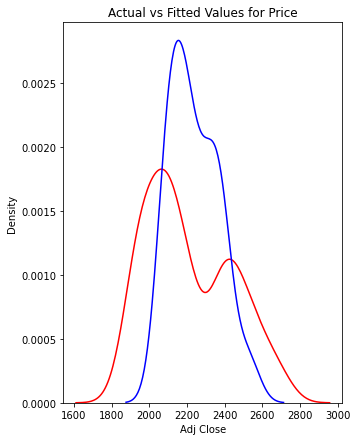

In [27]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [29]:
rfc.predict([[2000,1000000]])

array([2435.20849384])

In [75]:
#### SVM ####

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df = pd.read_csv(r'C:\Users\Vineet Jain\Desktop\Rel.csv')


In [31]:
df_2 = df[["Adj Close", "Volume"]]
df_2["Pct_change"] = df["Adj Close"].pct_change()
df_2.head()

C:\Users\VINEET~1\AppData\Local\Temp/ipykernel_6900/601306169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["Pct_change"] = df["Adj Close"].pct_change()


,Adj Close,Volume,Pct_change
0,1891.166260,15371556,NaN
1,1950.774536,18996047,0.031519
2,1932.583130,12284876,-0.009325
3,1954.313110,9946818,0.011244
4,1931.237305,9503790,-0.011808


In [32]:
# Drop null values
df_2.dropna(inplace = True)
df_2.head()

C:\Users\Vineet Jain\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Adj Close,Volume,Pct_change
1,1950.774536,18996047,0.031519
2,1932.583130,12284876,-0.009325
3,1954.313110,9946818,0.011244
4,1931.237305,9503790,-0.011808
5,1977.588257,16198856,0.024001


In [33]:
X = df_2.drop('Adj Close',axis=1)
y = df_2['Adj Close']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
from sklearn.svm import SVR

In [36]:
svr = SVR(kernel = 'linear',C = 1000)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc= StandardScaler().fit(X_train)

In [39]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_test_std

array([[-0.93442975,  0.11401674],
       [-0.45580525, -0.41113482],
       [ 0.34116849, -1.41401458],
       [-0.120072  , -0.65536544],
       [-0.05272588,  0.71338984],
       [-0.81476887,  0.77635055],
       [-0.63996525, -1.13477892],
       [-0.42936165,  0.36575893],
       [-0.66808001, -0.18221799],
       [-0.66022435, -0.98387393],
       [-0.03089392,  1.34070152],
       [-1.03594222,  0.19822072],
       [-1.00216788,  0.35492353],
       [ 0.2344354 , -1.4645902 ],
       [-0.53414372, -0.51656164],
       [-0.73292305,  1.28250764],
       [-1.03257356,  0.62136164],
       [ 0.6662314 , -0.01977887],
       [-0.49826447,  0.0115569 ],
       [-0.20857646, -0.4799727 ],
       [-0.4531581 , -1.31575118],
       [ 0.2507859 , -1.84959684],
       [-0.60906101,  0.14124326],
       [-0.83633057,  0.27866424],
       [ 0.10685057, -1.40629622],
       [-0.47012779, -0.79777242],
       [ 1.008651  ,  0.1746053 ],
       [-0.45894348,  0.8039558 ],
       [ 1.11194734,

In [40]:
svr.fit(X_train_std,y_train)
y_test_pred = svr.predict(X_test_std)

In [41]:
y_train_pred = svr.predict(X_train_std)

In [42]:
y_test_pred

array([2217.45592745, 2162.3591791 , 2065.38986077, 2128.76251357,
       2179.71091513, 2235.97364265, 2145.89199401, 2192.1072909 ,
       2186.63265893, 2153.45992523, 2203.69755647, 2228.0357073 ,
       2232.0318353 , 2070.85339317, 2163.5898735 , 2250.80138546,
       2245.01580061, 2099.21385168, 2182.55046786, 2142.13606887,
       2125.36405744, 2054.03537037, 2195.63515734, 2217.24237565,
       2082.21621169, 2147.63631042, 2082.99311058, 2212.02201456,
       2006.00654851, 2199.81380352, 2194.96583864, 2077.38921615,
       2209.09422791, 2095.73214004, 2047.85976513, 2186.0864999 ,
       1936.60195124, 2144.0764222 , 2216.73789545, 2222.14932532,
       2156.44664592, 2170.49884183, 2126.80138416, 2175.19542803,
       2165.00286919, 2143.66458282, 2175.9465897 , 2211.62712421,
       2101.129251  , 2158.60559063])

In [43]:
from sklearn import metrics

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Squared Error: 47696.41189127915
Root Mean Squared Error: 218.3950821133094


In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error: 173.2929460383432


In [48]:
#Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test,y_test_pred)/y_test))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

Mean Absolute Percentage Error (MAPE): 7.54 %


In [44]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.012828947626575382

In [46]:
r2_score(y_test,y_test_pred)

0.02036246693455679

C:\Users\Vineet Jain\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Vineet Jain\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


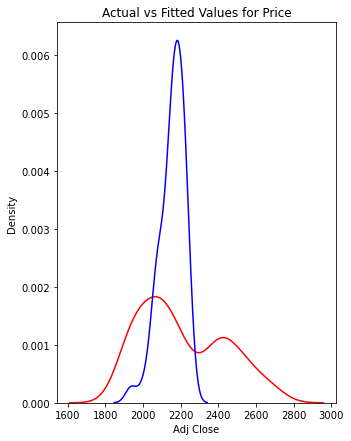

In [47]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()